In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import numpy as np
import cv2

from PIL import Image

In [2]:
data_train = np.load('data_train.npz', allow_pickle=True, mmap_mode='r')
data_train = data_train['data']


labels_train = np.load('labels_train.npz', allow_pickle=True, mmap_mode='r')
labels_train = labels_train['labels']

data_test = np.load('data_test_1.npz', allow_pickle=True, mmap_mode='r')
data_test = data_test['data']

In [59]:
data_test.shape

(1006, 782, 251)

In [3]:
def MinMaxNormalization(image,vmin=0, vmax=1):
        arr = np.array(image).astype('float32')
        arr = (arr - arr.min()) / (arr.max() - arr.min())
        arr = (vmax - vmin) * arr + vmin
        return arr

In [54]:
df = pd.DataFrame(columns=['path'])
df.to_csv('train_image.csv')

df = pd.DataFrame(columns=['path'])
df.to_csv('train_mask.csv')

df = pd.DataFrame(columns=['path'])
df.to_csv('test_image.csv') 

#### 1 D image extraction

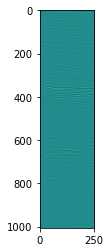

In [62]:
plt.imshow(data_test[:,20,:])

In [58]:
df_train_image = pd.read_csv('train_image.csv')
df_train_mask = pd.read_csv('train_mask.csv')

for i in range(data_train.shape[1]):
    # Extract image and mask
    x = data_train[:,i,:]
    y = labels_train[:,i,:]
    
    # Normalize and standardize the image
    x = MinMaxNormalization(x,vmin=0, vmax=1)
    x=(x-x.mean())/x.std()
    
    # Resize image and mask
    image = Image.fromarray(cm.gist_earth(x, bytes=True)).resize((512,512))
    mask = Image.fromarray(y).resize((512,512))
    
    image.save('Train/Images/seismic_x_'+str(i)+'.png')
    mask.save('Train/Mask/seismic_x_'+str(i)+'.png')
    df_train_image.loc[i,'path'] = 'Train/Images/seismic_x_'+str(i)+'.png'
    df_train_mask.loc[i,'path'] = 'Train/Mask/seismic_x_'+str(i)+'.png'

df_train_image.to_csv('train_image.csv')
df_train_mask.to_csv('train_mask.csv')

AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [30]:
df_test_image = pd.read_csv('test_image.csv')

for i in range(data_test.shape[1]):
    x = data_test[:,i,:]
    
    # Normalize and standardize the image
    x = MinMaxNormalization(x,vmin=0, vmax=1)
    x=(x-x.mean())/x.std()
    image = Image.fromarray(cm.gist_earth(x, bytes=True)).resize((512,512))
    
    image.save('Test/Images/seismic_x_'+str(i)+'.png')
    df_test_image.loc[i,'path'] = 'Test/Images/seismic_x_'+str(i)+'.png'

df_test_image.to_csv('test_image.csv')

#### 2 D image extraction

In [ ]:
df_train_image = pd.read_csv('train_image.csv')
df_train_mask = pd.read_csv('train_mask.csv')

for i in range(data_train.shape[1]):
    x = data_train[:,i,:]
    y = labels_train[:,i,:]
    
    x = MinMaxNormalization(x)
    x = resize(x,(512,512))
    y = resize(y,(512,512))
    
    cv2.imwrite('Train/Images/seismic_x_'+str(i)+'.png', x)
    cv2.imwrite('Train/Mask/seismic_x_'+str(i)+'.png', y)
    df_train_image.loc[i,'path'] = 'Train/Images/seismic_x_'+str(i)+'.png'
    df_train_mask.loc[i,'path'] = 'Train/Mask/seismic_x_'+str(i)+'.png'

for i in range(data_train.shape[2]):    
    x = data_train[:,:,i]
    y = labels_train[:,:,i]
    
    x = MinMaxNormalization(x)
    x = resize(x,(512,512))
    y = resize(y,(512,512))

    cv2.imwrite('Train/Images/seismic_y_'+str(i+data_train.shape[1])+'.png', x)
    cv2.imwrite('Train/Mask/seismic_y_'+str(i+data_train.shape[1])+'.png', y)
    
    df_train_image.loc[i+data_train.shape[1],'path'] = 'Train/Images/seismic_y_'+str(i)+'.png'
    df_train_mask.loc[i+data_train.shape[1],'path'] = 'Train/Mask/seismic_y_'+str(i)+'.png'

df_train_image.to_csv('train_image.csv')
df_train_mask.to_csv('train_mask.csv')

In [ ]:
df_test_image = pd.read_csv('test_image.csv')

for i in range(data_test.shape[1]):
    x = data_test[:,i,:]
    
    x = MinMaxNormalization(x)
    x = resize(x,(512,512))
    
    cv2.imwrite('Test/Images/seismic_x_'+str(i)+'.png', x)
    df_test_image.loc[i,'path'] = 'Test/Images/seismic_x_'+str(i)+'.png'

for i in range(data_test.shape[2]):    
    x = data_test[:,:,i]
    
    x = MinMaxNormalization(x)
    x = resize(x,(512,512))

    cv2.imwrite('Test/Images/seismic_y_'+str(i+data_test.shape[1])+'.png', x)
    
    df_test_image.loc[data_test.shape[1]+i,'path'] = 'Test/Images/seismic_y_'+str(i)+'.png'

df_test_image.to_csv('test_image.csv')